In [47]:
# import all necessary visualization library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
data = pd.read_csv(r"C:\Users\User\Desktop\Messy-Food-Waste-Prediction\data\cleaned_data\cleaned_food_waste_data.csv")

In [49]:
data

,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,196.0,13,27.887273,45.362854,0,0,7.740587,Intermediate,dairy,28.946465
1,148.0,16,27.714300,69.046113,1,0,41.184305,Beginner,meat,53.008323
2,157.0,19,19.173902,46.292823,6,0,41.543492,Beginner,meat,48.621527
3,297.0,10,26.375233,79.741064,0,0,26.525097,Intermediate,meat,44.156984
4,241.0,18,16.863506,79.285919,3,0,11.834878,Intermediate,dairy,27.393670
...,...,...,...,...,...,...,...,...,...,...
741,395.0,18,17.354199,45.138435,1,0,40.550668,Intermediate,grains,50.369152
742,483.0,11,24.912137,59.485091,6,0,36.470276,Intermediate,dairy,43.070121
743,243.0,11,28.870945,70.508404,2,0,19.767203,Intermediate,meat,29.632560
744,406.0,10,19.061638,55.286642,0,0,28.560361,Expert,meat,44.615759


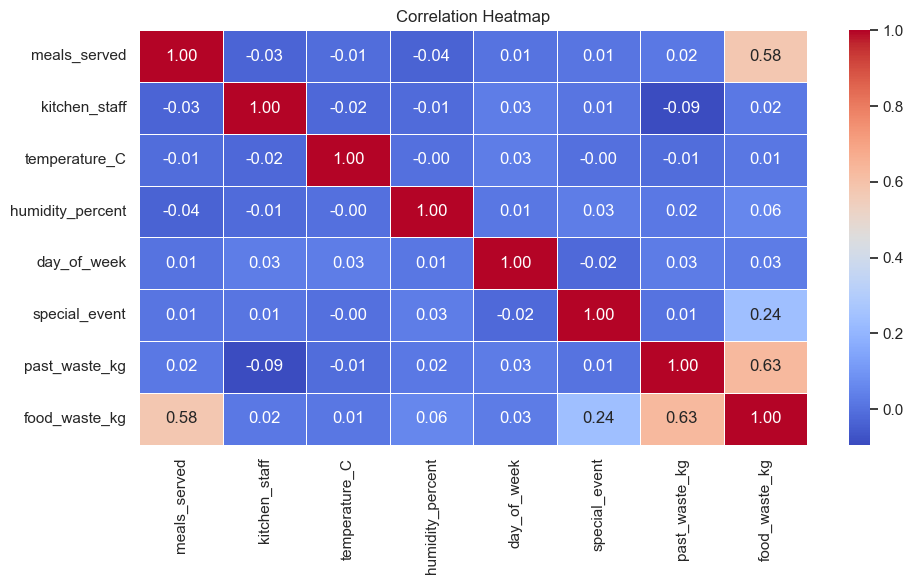

In [50]:

# Compute correlation matrix for numeric columns
corr_matrix = data.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


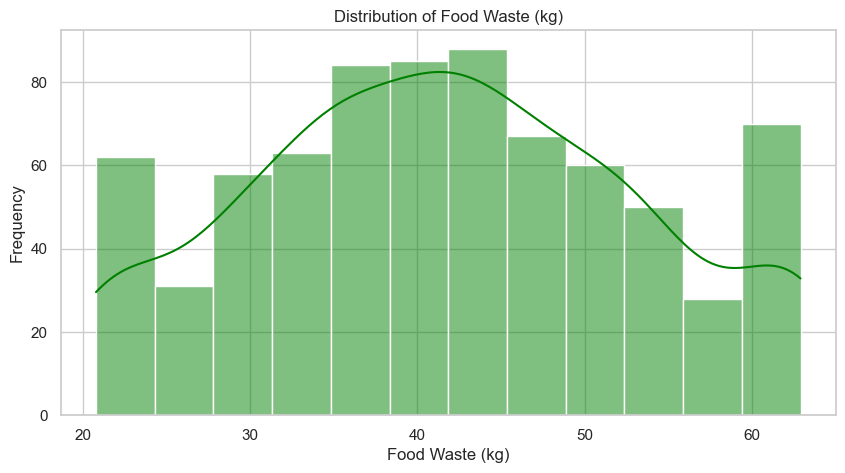

In [51]:

# Ensure plots display well
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 1. Distribution of food waste
sns.histplot(data["food_waste_kg"], kde=True, color='green')
plt.title("Distribution of Food Waste (kg)")
plt.xlabel("Food Waste (kg)")
plt.ylabel("Frequency")
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_15216\3296396413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="staff_experience", y="food_waste_kg", data=data, palette="Set2")


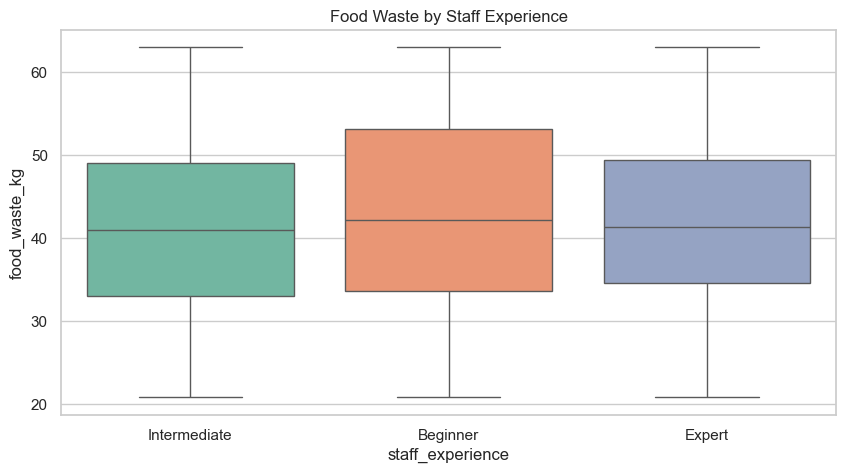

In [52]:
# 3. Food waste by staff experience
sns.boxplot(x="staff_experience", y="food_waste_kg", data=data, palette="Set2")
plt.title("Food Waste by Staff Experience")
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_15216\2103023154.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="food_waste_kg", data=data, estimator='mean', palette="coolwarm")


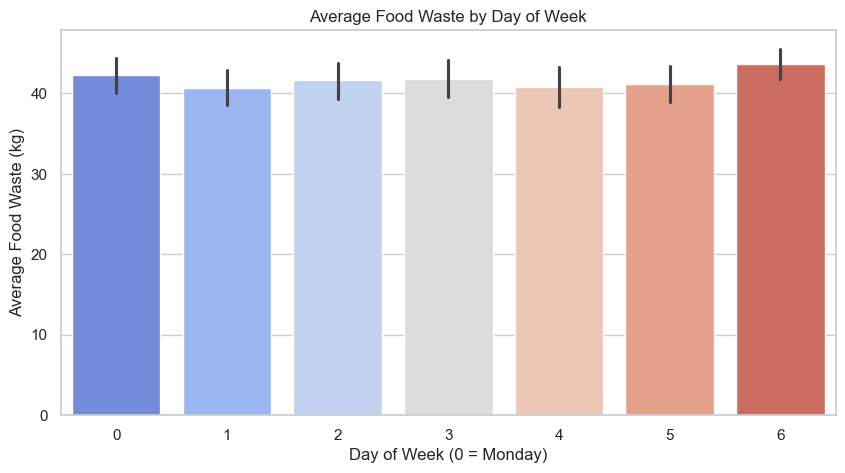

In [53]:
# 4. Average food waste by day of week
sns.barplot(x="day_of_week", y="food_waste_kg", data=data, estimator='mean', palette="coolwarm")
plt.title("Average Food Waste by Day of Week")
plt.xlabel("Day of Week (0 = Monday)")
plt.ylabel("Average Food Waste (kg)")
plt.show()



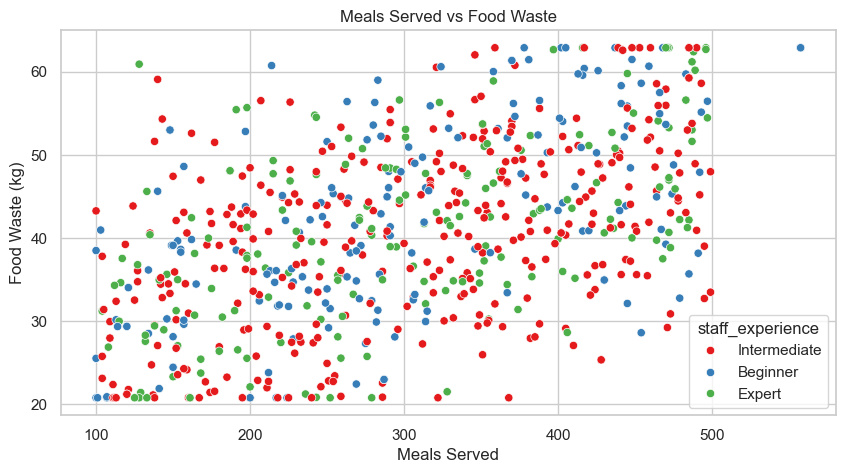

In [54]:
# 5. Meals served vs food waste
sns.scatterplot(x="meals_served", y="food_waste_kg", data=data, hue="staff_experience", palette="Set1")
plt.title("Meals Served vs Food Waste")
plt.xlabel("Meals Served")
plt.ylabel("Food Waste (kg)")
plt.show()



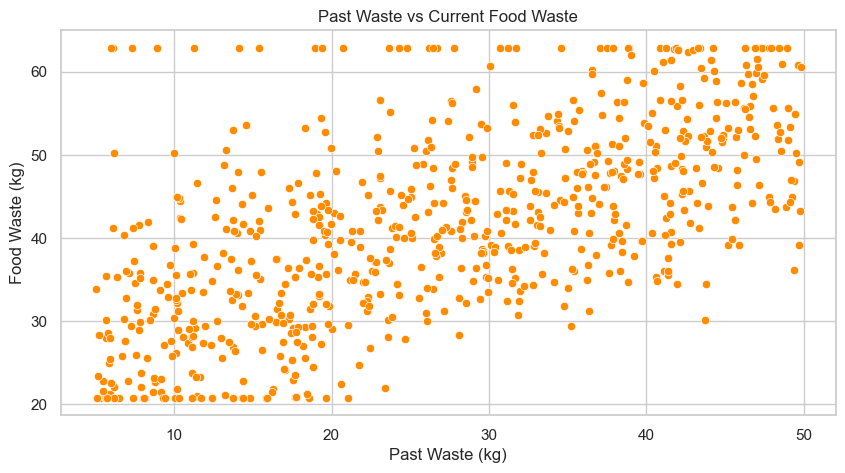

In [55]:
# 6. Past waste vs current food waste
sns.scatterplot(x="past_waste_kg", y="food_waste_kg", data=data, color="darkorange")
plt.title("Past Waste vs Current Food Waste")
plt.xlabel("Past Waste (kg)")
plt.ylabel("Food Waste (kg)")
plt.show()




C:\Users\User\AppData\Local\Temp\ipykernel_15216\98719366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="waste_category", y="food_waste_kg", data=data, palette="pastel")


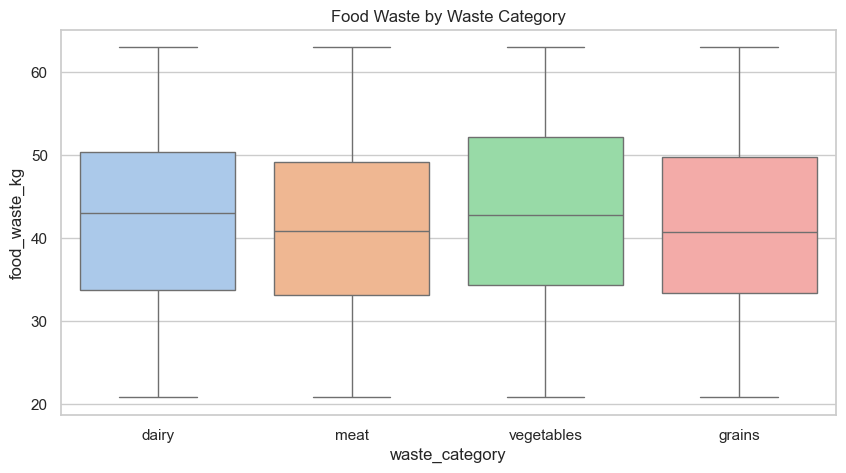

In [56]:
# 7. Food waste by waste category
sns.boxplot(x="waste_category", y="food_waste_kg", data=data, palette="pastel")
plt.title("Food Waste by Waste Category")
plt.show()



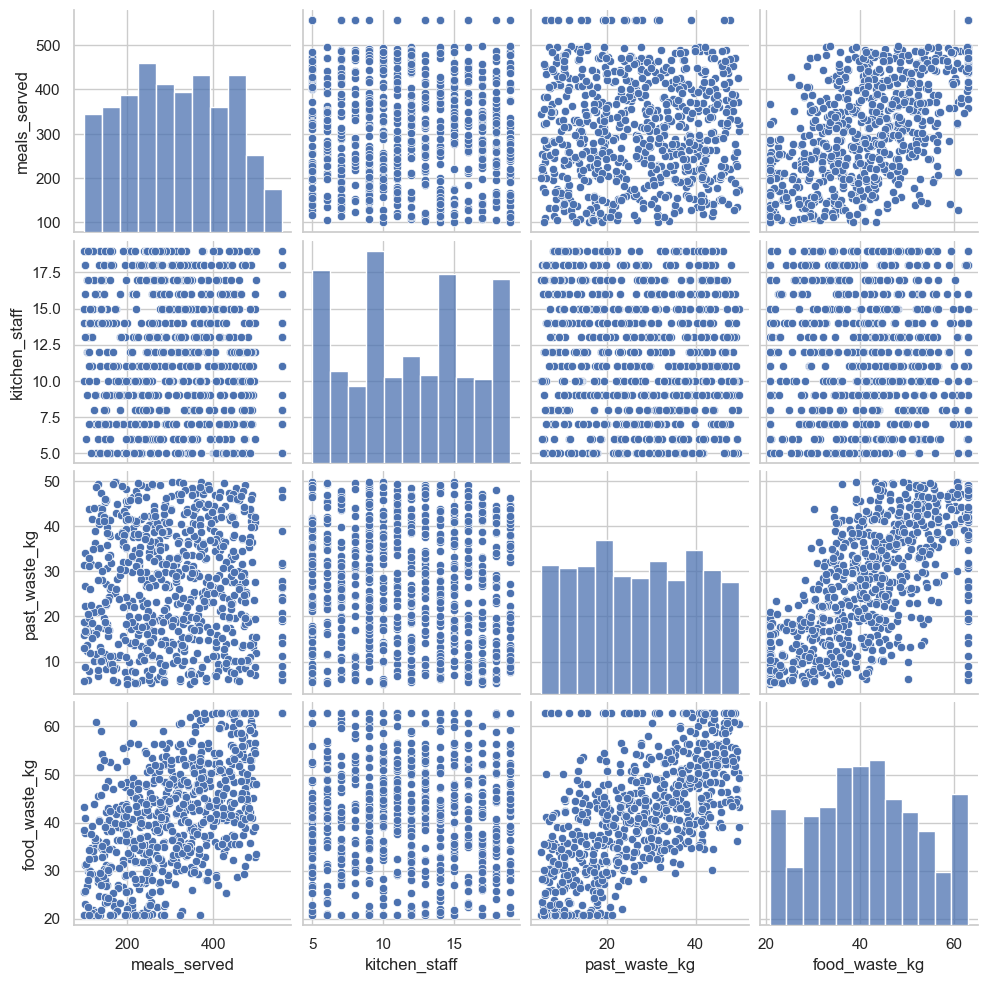

In [57]:
sns.pairplot(data[["meals_served", "kitchen_staff", "past_waste_kg", "food_waste_kg"]])
plt.show()


c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


📊 Evaluation Metrics:
MAE: 1.76
RMSE: 2.45
R²: 0.9550


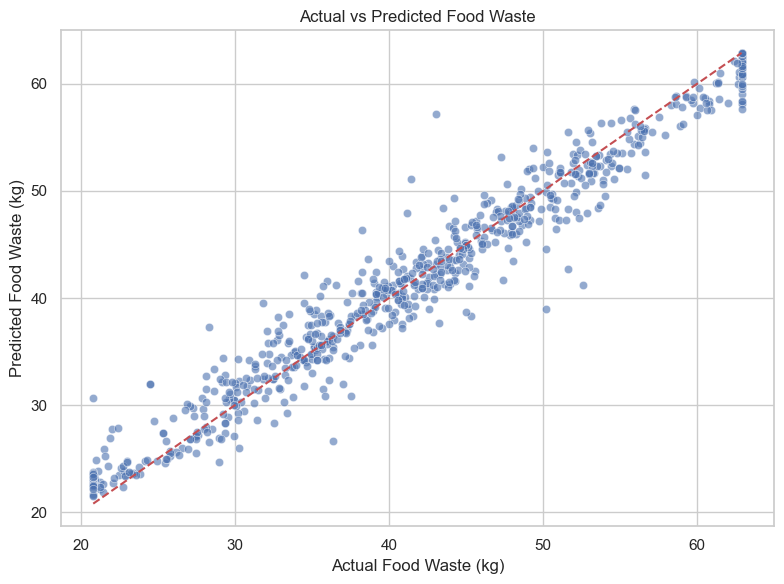

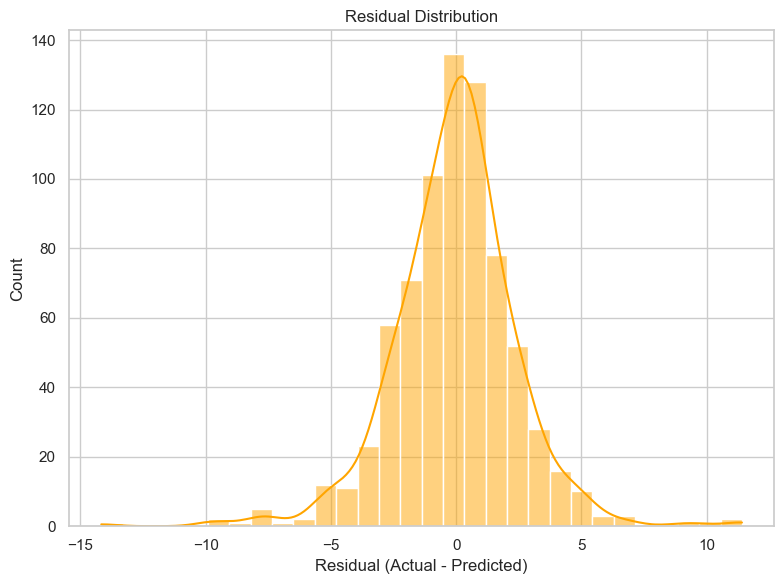

C:\Users\User\AppData\Local\Temp\ipykernel_15216\2963770062.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=fi_df.head(10), palette="crest")


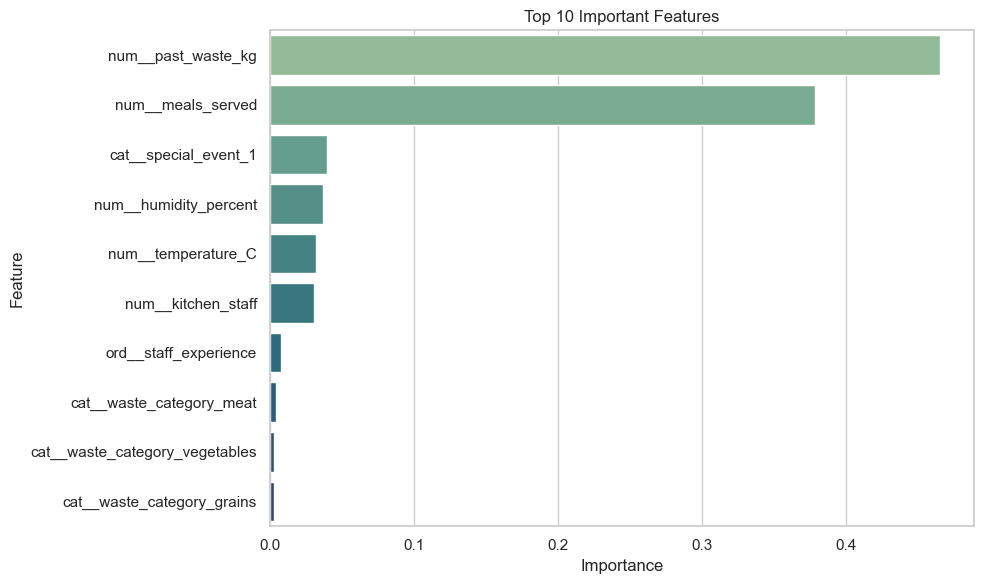

In [63]:

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load the saved model pipeline
model = joblib.load(r"C:\Users\User\Desktop\Messy-Food-Waste-Prediction\models\best_food_waste_model.pkl")

# 2. Load the cleaned dataset (you can also just load test set if available)
data = pd.read_csv(r"C:\Users\User\Desktop\Messy-Food-Waste-Prediction\data\cleaned_data\cleaned_food_waste_data.csv")

# 3. Separate features and target
X = data.drop(columns=["food_waste_kg"])
y = data["food_waste_kg"]

# 4. Make predictions
y_pred = model.predict(X)

# 5. Evaluate
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

print(f"📊 Evaluation Metrics:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.4f}")

# 6. 📈 Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Food Waste (kg)")
plt.ylabel("Predicted Food Waste (kg)")
plt.title("Actual vs Predicted Food Waste")
plt.tight_layout()
plt.show()

# 7. 📉 Residuals Histogram
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.tight_layout()
plt.show()

# 8. 📊 Feature Importance (if using tree-based model)
if hasattr(model.named_steps["regressor"], "feature_importances_"):
    # Get feature names after preprocessing
    feature_names = model.named_steps["preprocessor"].get_feature_names_out()
    importances = model.named_steps["regressor"].feature_importances_

    fi_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=fi_df.head(10), palette="crest")
    plt.title("Top 10 Important Features")
    plt.tight_layout()
    plt.show()
